# Semantic Role Labeling(SRL)

Từ các chuỗi tuyến tính sang các biểu diễn ngữ nghĩa có cấu trúc

Copyright 2025, Denis Rothman

Cuốn sổ tay này cung cấp một công cụ thực hành để trực quan hóa cấu trúc ngữ nghĩa sâu của một câu thông qua Semantic Role Labeling (SRL).

Chúng ta vượt lên trên cách nhìn nhận ngôn ngữ như một chuỗi tuyến tính một chiều gồm các từ, và bắt đầu thiết kế nó như một cấu trúc đa chiều của ý nghĩa.

Hãy thử nghiệm với các ví dụ dưới đây, sau đó hãy tự tạo những bản thiết kế ngữ nghĩa riêng. Đây là một bước thực tiễn trong hành trình kỹ thuật ngữ cảnh của bạn.

In [16]:
import matplotlib.pyplot as plt

# Một tiện ích để vẽ các mũi tên có hướng, rõ ràng nhằm nối động từ với các vai trò của nó
from matplotlib.patches import FancyArrowPatch

def _plot_stemma(verb, srl_roles):
    """Internal helper function to generate the stemma visualization."""
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 10)
    ax.axis('off')

    verb_style = dict(boxstyle="round,pad=0.5", fc="lightblue", ec="b")
    role_style = dict(boxstyle="round,pad=0.5", fc="lightgreen", ec="g")

    verb_pos = (5, 8.5)
    ax.text(verb_pos[0], verb_pos[1], verb, ha="center", va="center",
            bbox=verb_style, fontsize=12)

    srl_items = list(srl_roles.items())
    num_roles = len(srl_items)
    x_positions = [10 * (i + 1) / (num_roles + 1) for i in range(num_roles)]
    y_position = 4.5

    for i, (role, text) in enumerate(srl_items):
        child_pos = (x_positions[i], y_position)
        ax.text(child_pos[0], child_pos[1], text, ha="center", va="center",
                bbox=role_style, fontsize=10, wrap=True)

        arrow = FancyArrowPatch(
            verb_pos,
            child_pos,
            arrowstyle='->',
            mutation_scale=20,
            shrinkA=15,
            shrinkB=15,
            color='gray'
        )
        ax.add_patch(arrow)

        label_pos = ((verb_pos[0] + child_pos[0]) / 2 + 0.3, (verb_pos[1] + child_pos[1]) / 2 + 0.5 - 0.4*i)
        ax.text(label_pos[0], label_pos[1], role, ha="center", va="center",
                fontsize=9, color='black', bbox=dict(boxstyle="square,pad=0.1", fc="white", ec="none"))

    fig.suptitle("The Semantic Blueprint (Stemma Visualization)", fontsize=16)
    plt.show()


def visualize_srl(verb, agent=None, patient=None, recipient=None, temporal=None, location=None, manner=None):
    """
    Constructs an SRL dictionary from arguments and generates a stemma visualization.
    verb: hành động trung tâm hoặc trạng thái tồn tại 
    agent: thực thể thực hiện hành động
    patient: thực thể chịu tác động trực tiếp từ động từ 
    recipient: thực thể nhận đối tượng hoặc kết quả của hành động
    temporal: thời gian hành động diễn ra
    location: địa điểm hành động diễn ra
    manner: cách thức hành động diễn ra
    """
    srl_roles = {}
    if agent:
        srl_roles["Agent (ARG0)"] = agent
    if patient:
        srl_roles["Patient (ARG1)"] = patient
    if recipient:
        srl_roles["Recipient (ARG2)"] = recipient
    if temporal:
        srl_roles["Temporal (ARGM-TMP)"] = temporal
    if location:
        srl_roles["Location (ARGM-LOC)"] = location
    if manner:
        srl_roles["Manner (ARGM-MNR)"] = manner

    if not srl_roles:
        print("Error: At least one semantic role must be provided.")
        return

    _plot_stemma(verb, srl_roles)

Example sentence:

```
Sarah pitched the new project to the board in the morning.
```

dịch

```
Sarah trình bày dự án mới đến ban giám đốc vào buổi sáng.
```

Example 1: A complete action with multiple roles.


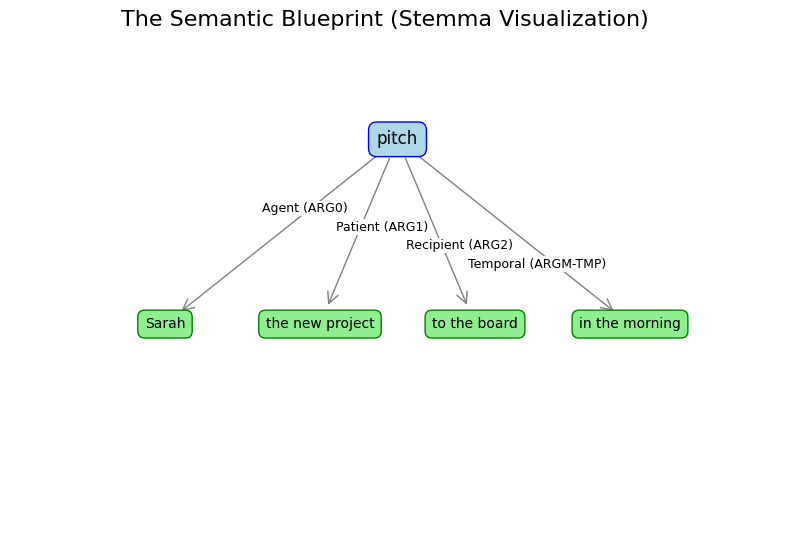

In [17]:
# --- Example 1:  A complete action with multiple roles ---
print("Example 1: A complete action with multiple roles.")
visualize_srl(
    verb="pitch",
    agent="Sarah",
    patient="the new project",
    recipient="to the board",
    temporal="in the morning"
)


Example 2: An action with a location


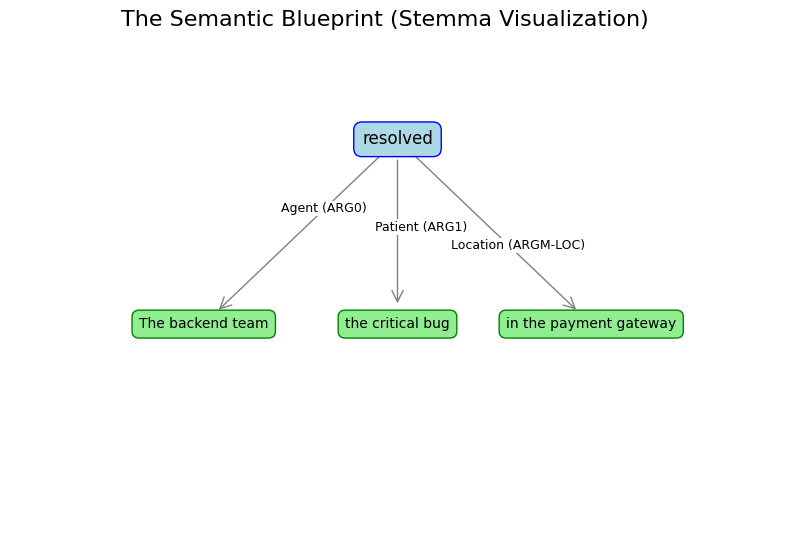

In [18]:
# --- Example 2: An action with a location ---
print("\nExample 2: An action with a location")
visualize_srl(
    verb="resolved",
    agent="The backend team",
    patient="the critical bug",
    location="in the payment gateway"
)



Example 3: Describing how an action was performed


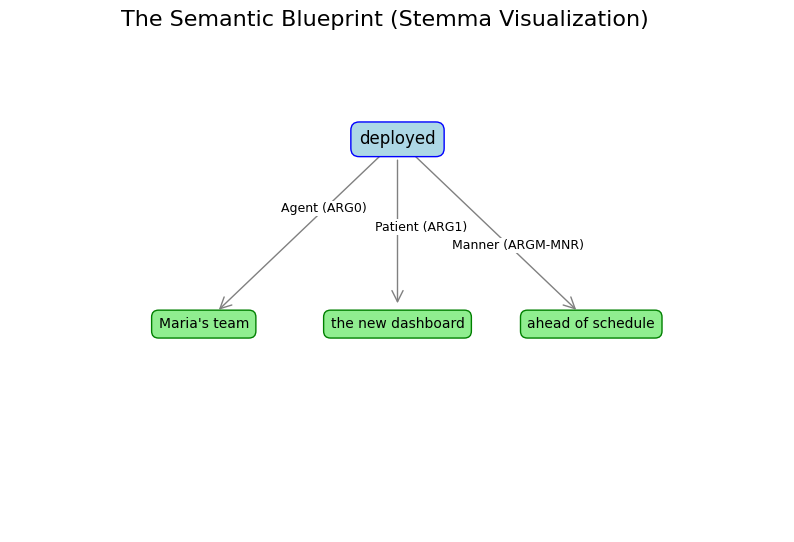

In [19]:
# --- Example 3: Describing how an action was performed ---
print("\nExample 3: Describing how an action was performed")
visualize_srl(
    verb="deployed",
    agent="Maria's team",
    patient="the new dashboard",
    manner="ahead of schedule"
)